# Introduction to Statistical Learning

- Learn the differences between __supervised and unsupervised__ learning
- Learn to distinguish __regression and classification__
- Learn about the __loss functions__ used in different settings

## Generating Example Regression Data

how to __generate example regression data__ using Python

In [6]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0, scale = 1, size = n)

In [2]:
np.mean(x)

4.8587792760014565

In [3]:
np.mean(y)

14.80142786070299

Text(0, 0.5, 'Y')

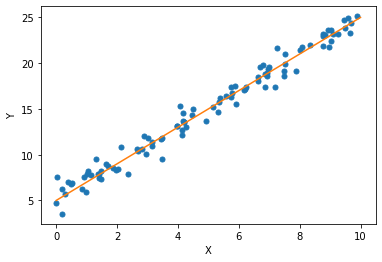

In [9]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0,10])
plt.plot(xx, beta_0+beta_1*xx)
plt.xlabel("X")
plt.ylabel("Y")

In [10]:
## Simple Linear Regression
def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [11]:
rss

81.540007425512

## Least Squares Estimation in Code

- how to use Python to compute the __least squares estimate__
- how to use Python to __estimate parameter values__ that minimize the residual sum of squares (RSS) criterion

In [12]:
rss = [] 
slopes = np.arange(-10, 15, 0.01) 
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x )**2))

In [14]:
ind_min = np.argmin(rss)

In [15]:
ind_min

1200

In [16]:
print("estimate for the slope: ", slopes[ind_min])

estimate for the slope:  1.9999999999997442


Text(0, 0.5, 'RSS')

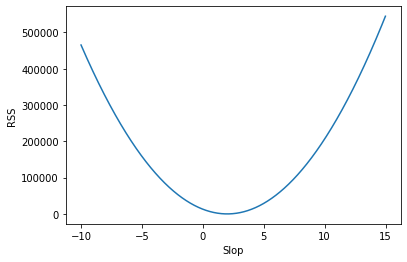

In [18]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slop")
plt.ylabel("RSS")

## Simple Linear Regression in Code
how to __fit__ a simple __linear regression__ model in Python

In [19]:
import statsmodels.api as sm

In [20]:
mod = sm.OLS(y,x)

In [21]:
est = mod.fit()

In [22]:
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Tue, 19 May 2020   Prob (F-statistic):                    1.14e-75
Time:                        18:24:10   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
X = sm.add_constant(x)

In [25]:
mod = sm.OLS(y, X)

In [26]:
est = mod.fit()

In [27]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.47e-82
Time:                        18:26:49   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

## Multiple Linear Regression

## scikit-learn for Linear Regression
- how to generate data from a simple model
- how to fit a linear regression model using the scikit-learn library
- how to evaluate the fit of a model by determining the  R2  statistic 

In [28]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0, scale = 1, size = n)

In [29]:
X = np.stack([x_1, x_2], axis=1)

Text(0.5, 0, '$y$')

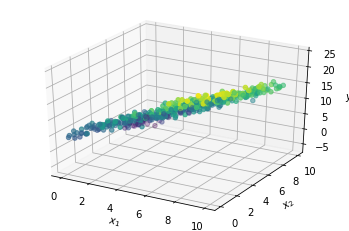

In [33]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:, 1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression(fit_intercept=True)

In [36]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lm.intercept_

5.154077763777254

In [38]:
lm.coef_

array([ 1.9999379 , -1.02026449])

In [39]:
X_0 = np.array([2,4])

In [41]:
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [42]:
lm.score(X,y)

0.9798997316600129

## Assessing Model Accuracy
- how to compute the __mean squared error (MSE)__ to evaluate the performance of a regression model
- how to separate data into __training and test__ datasets
- why both __underfitting and overfitting__ can be problematic

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5, random_state=1)

In [45]:
lm = LinearRegression(fit_intercept=True)

In [49]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
lm.score(X_test, y_test)

0.9794930834681773

# Generating Example Classification Data

- how to __generate__ and __plot classification__ data in Python

In [58]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [59]:
h = 1
sd = 1
n = 50

def gen_data(n, h, sd1, sd2):
    
    x1 = ss.norm.rvs(-h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)

    x2 = ss.norm.rvs(-h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    
    return (x1, y1, x2, y2)

In [60]:
(x1, y1, x2, y2) = gen_data(50, 1, 1, 1.5)

In [61]:
(x1, y1, x2, y2) = gen_data(1000, 1.5, 1, 1.5)

In [62]:
def plot_data(x1,y1,x2,y2):
    plt.figure()
    plt.plot(x1,y1,"o",ms=2)
    plt.plot(x2,y2,"o",ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


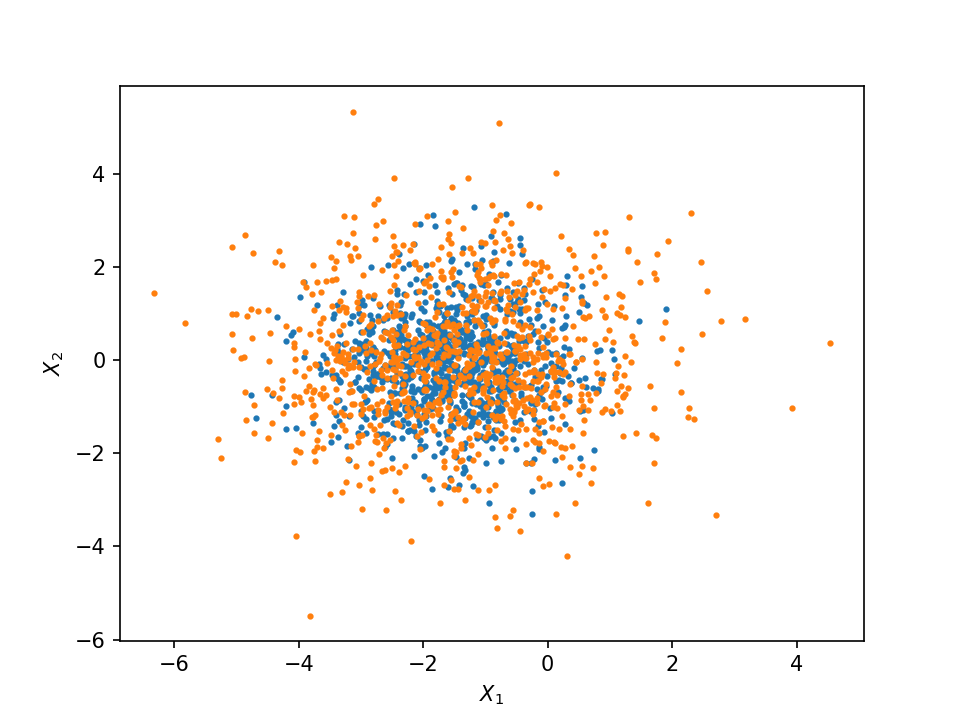

In [63]:
plot_data(x1,y1,x2,y2)

In [64]:
def gen_data(n, h, sd1, sd2):
    x1 = ss.norm.rvs(h, sd1, n)
    y1 = ss.norm.rvs(0, sd1, n)
    x2 = ss.norm.rvs(-h, sd2, n)
    y2 = ss.norm.rvs(0, sd2, n)
    return (x1, y1, x2, y2)

def plot_data(x1, y1, x2, y2):
    plt.figure()
    plt.plot(x1, y1, "o", ms=2)
    plt.plot(x2, y2, "o", ms=2)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


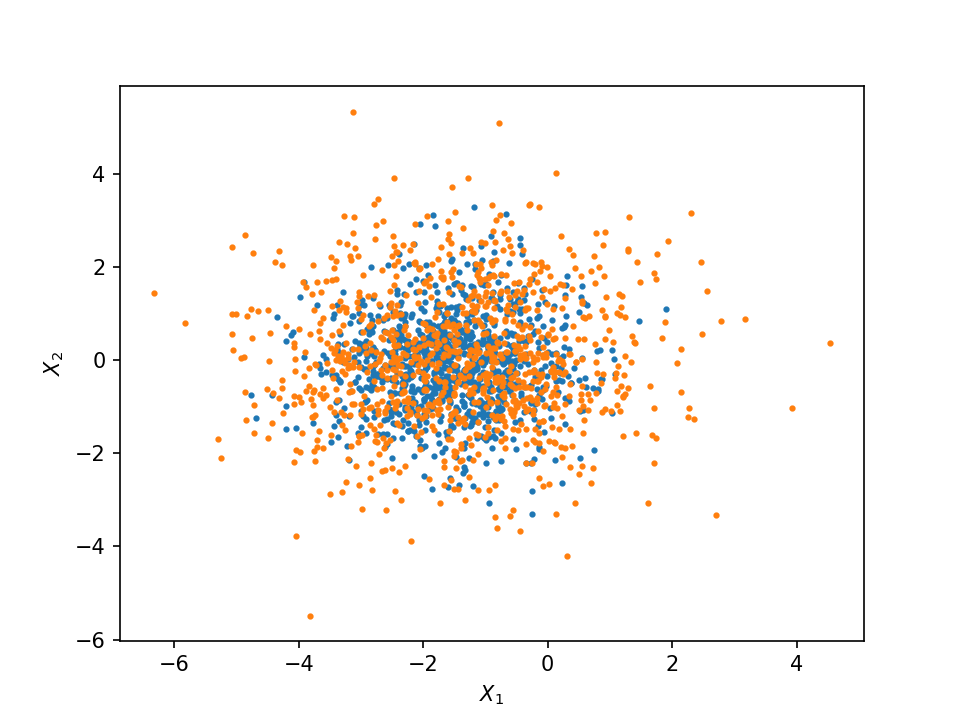

In [68]:
gen_data(1000, 0, 1, 1)
plot_data(x1, y1, x2, y2)

<IPython.core.display.Javascript object>


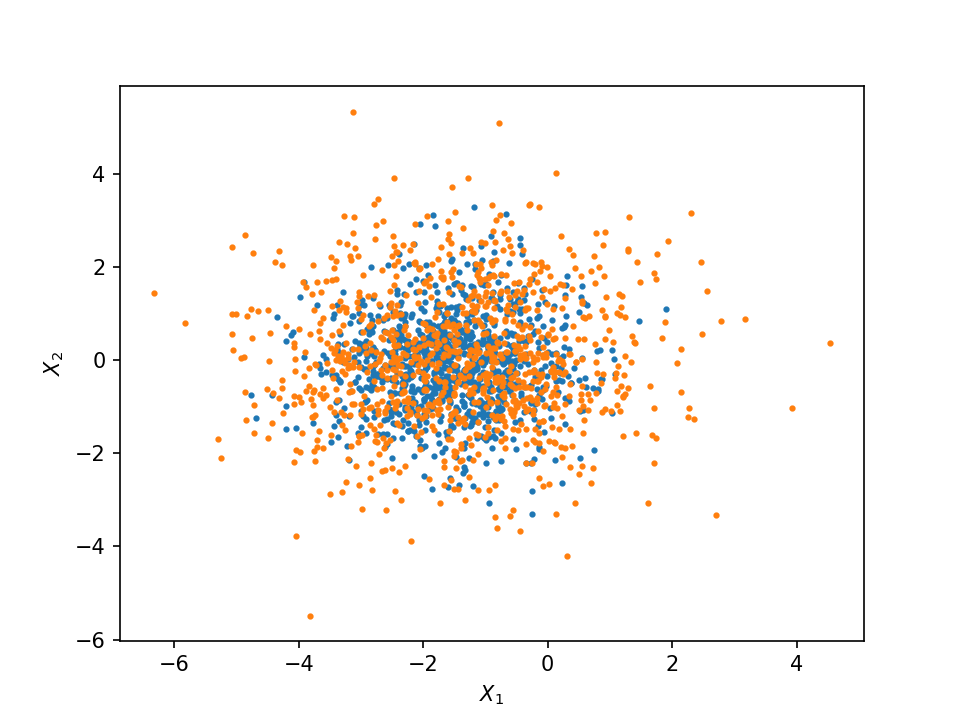

In [69]:
gen_data(1000, 1, 2, 2.5)
plot_data(x1, y1, x2, y2)

<IPython.core.display.Javascript object>


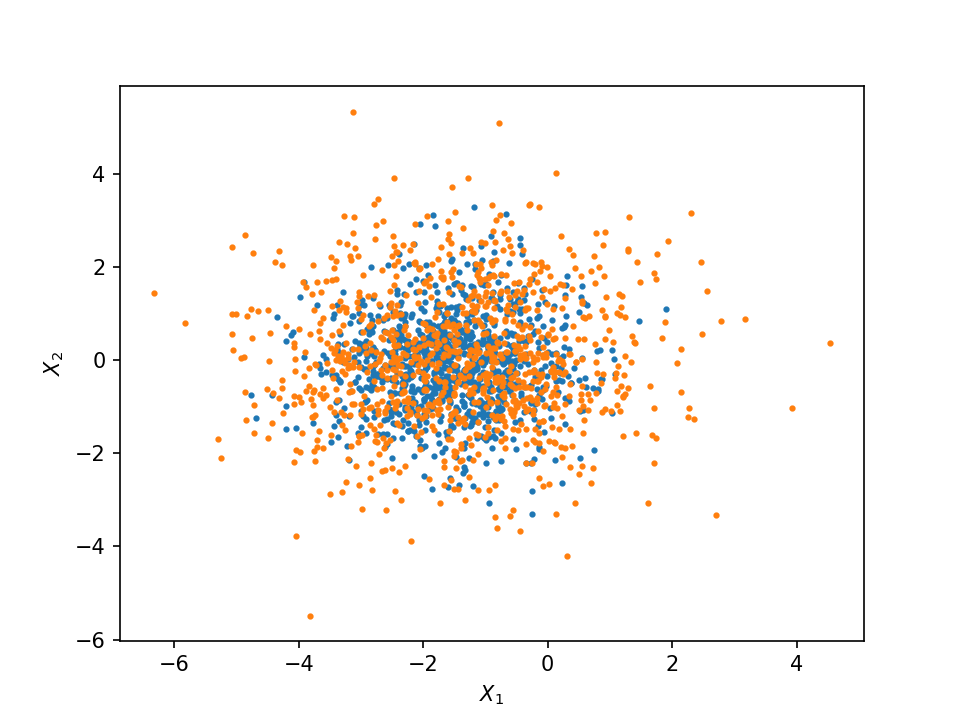

In [70]:
gen_data(1000, 10, 100, 100)
plot_data(x1, y1, x2, y2)

<IPython.core.display.Javascript object>


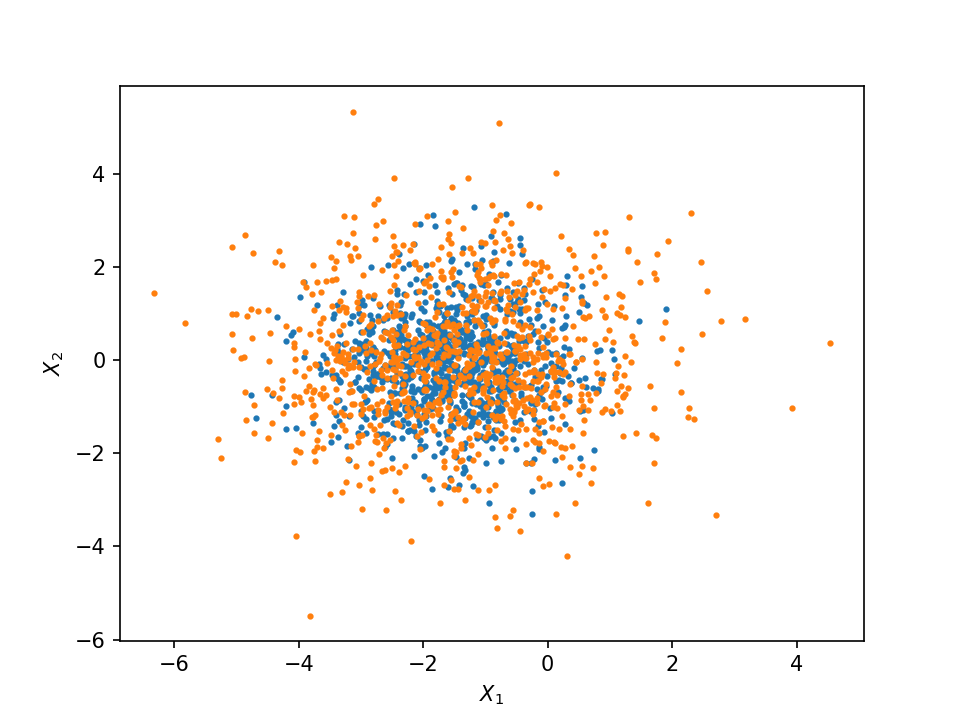

In [71]:
gen_data(1000, 20, .5, .5)
plot_data(x1, y1, x2, y2)

## Logistic Regression

In [72]:
def prob_to_odds(p):
    if p <= 0 or p >= 1:
        print("Probabilities must be between 0 and 1.")
    return p / (1-p)

In [74]:
prob_to_odds(0.2)

0.25

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
clf = LogisticRegression()

In [83]:
X = np.vstack((np.vstack((x1,y1)).T, np.vstack((x2,y2)).T)) 

In [85]:
X.shape

(2000, 2)

In [90]:
n = 1000
y = np.hstack((np.repeat(1,n), np.repeat(2,n)))

In [91]:
y.shape

(2000,)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.5, random_state=1)

In [93]:
X_train.shape

(1000, 2)

In [94]:
y_train.shape

(1000,)

In [97]:
clf.fit(X_train, y_train)

C:\Users\QV192XH\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
clf.score(X_test,y_test)

0.516

In [99]:
clf.predict_proba(np.array([-2,0]).reshape(1,-1))

array([[0.50705604, 0.49294396]])

In [100]:
clf.predict(np.array([-2,0]).reshape(1,-1))

array([1])

## Computing Predictive Probabilities Across the Grid

- how to use meshgrid and ravel to compute predictive probabilities
- how to plot the predictive probabilities

In [105]:
def plot_probs(ax, clf, class_no):
    xx1, xx2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    probs = clf.predict_proba(np.stack((xx1.ravel(), xx2.ravel()), axis=1))
    Z = probs[:,class_no]
    Z = Z.reshape(xx1.shape)
    CS = ax.contourf(xx1, xx2, Z)
    cbar = plt.colorbar(CS)
    plt.xlabel("$X_1$")
    plt.ylabel("$X_2$")

<IPython.core.display.Javascript object>


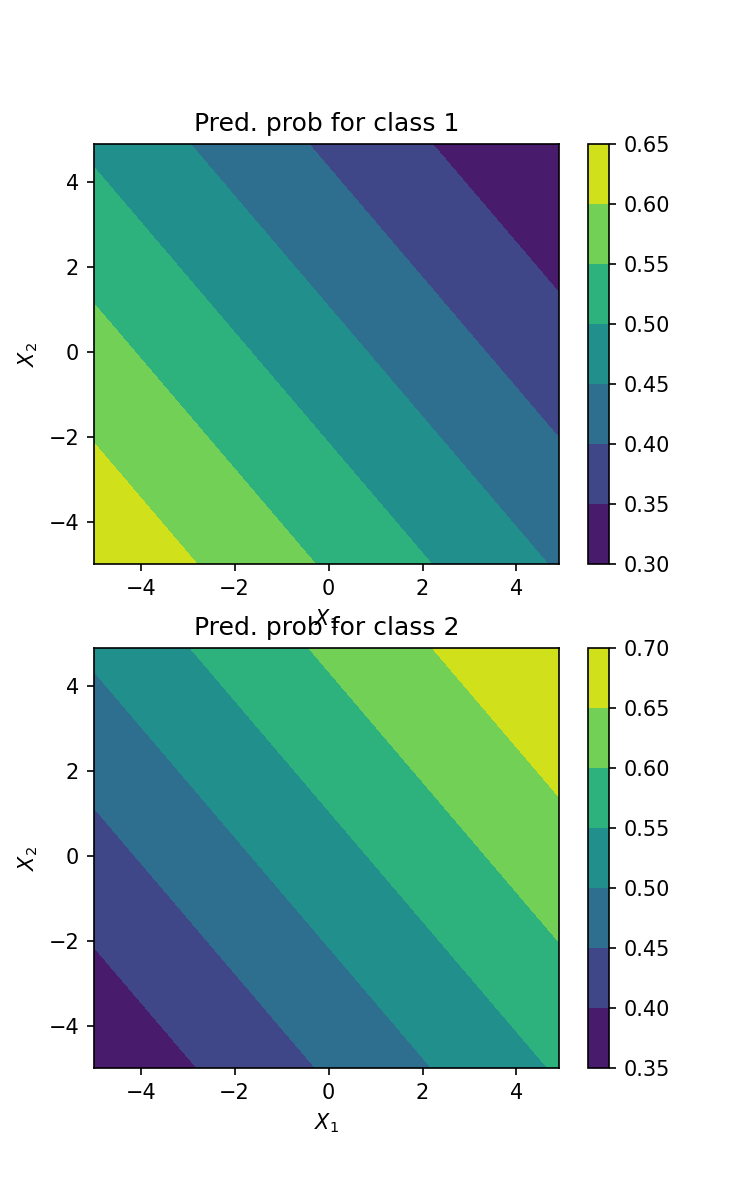

In [106]:
plt.figure(figsize=(5,8))
ax = plt.subplot(211)
plot_probs(ax, clf, 0)
plt.title("Pred. prob for class 1")
ax = plt.subplot(212)
plot_probs(ax, clf, 1)
plt.title("Pred. prob for class 2");

## Tree-Based Methods for Regression and Classification
- tree-based methods for regression and classification
- loss functions used in regression and classification settings

### Random Forest Predictions

- how to __aggregate the predictions__ of several trees to do __random forest__ classification and regression
- Learn about the __two types of randomness__ introduced by the random forest method

In [107]:
# To do random forest regression
from sklearn.ensemble import RandomForestRegressor

# To do random forest classification,
from sklearn.ensemble import RandomForestClassifier